# Método de Newton-Raphson aplicado a la Función de Rosenbrock (3D)

Aplicación del método de Newton-Raphson para encontrar el mínimo de la función de Rosenbrock:

$$
f(x, y) = (x - 1)^2 + 100 (y - x^2)^2
$$

considerada como una superficie en $\mathbb{R}^3$ (con $z = f(x,y)$). Se incluyen:
- Derivación simbólica del gradiente y Hessiana.
- Implementación numérica iterativa.
- Visualizaciones 2D y 3D del proceso de convergencia.
- Análisis de resultados y conclusiones.

---


## Introducción
La función de Rosenbrock, también conocida como "banana function" por la forma característica de su valle, es un caso clásico de prueba en optimización no lineal:

$$
f(x, y) = (x - 1)^2 + 100 (y - x^2)^2.
$$

Presenta un único mínimo global en $(x^*, y^*) = (1, 1)$, rodeado por un valle angosto y curvo que dificulta la convergencia rápida de muchos métodos de optimización. En este cuaderno aplicaremos el **método de Newton-Raphson**, que utiliza información de segunda derivada (la matriz Hessiana) para acelerar la convergencia hacia el mínimo.

El objetivo es ilustrar:
1. Obtención analítica y simbólica del gradiente y la Hessiana de $f$.
2. Implementación iterativa del método de Newton.
3. Visualización del proceso de convergencia en 2D y sobre la superficie 3D.
4. Discusión sobre la eficacia del método en este problema.


## Desarrollo Teórico
Consideremos la función:

$$
f(x, y) = (x - 1)^2 + 100 (y - x^2)^2.
$$

### 1. Expansión
Podemos expandir la función para facilitar derivaciones:
$$
f(x, y) = (x^2 - 2x + 1) + 100(y - x^2)^2.
$$

### 2. Gradiente
El gradiente $\nabla f(x,y)$ está compuesto por las derivadas parciales:
$$
\nabla f(x,y) = \begin{bmatrix} \dfrac{\partial f}{\partial x} \\ \dfrac{\partial f}{\partial y} \end{bmatrix}.
$$

Primero derivamos respecto de $x$:
$$
\begin{aligned}
\frac{\partial f}{\partial x} &= 2(x-1) + 100\cdot 2 (y - x^2)(-2x) \\
&= 2(x-1) - 400x (y - x^2).
\end{aligned}
$$
Derivando respecto de $y$:
$$
\frac{\partial f}{\partial y} = 200 (y - x^2).
$$
Por tanto:
$$
\nabla f(x,y) = \begin{bmatrix} 2(x-1) - 400x (y - x^2) \\ 200 (y - x^2) \end{bmatrix}.
$$

### 3. Hessiana
La Hessiana $H(x,y)$ es la matriz de segundas derivadas:
$$
H(x,y) = \begin{bmatrix} \dfrac{\partial^2 f}{\partial x^2} & \dfrac{\partial^2 f}{\partial x \partial y} \\ \dfrac{\partial^2 f}{\partial y \partial x} & \dfrac{\partial^2 f}{\partial y^2} \end{bmatrix}.
$$
Calculamos cada término:
- $\dfrac{\partial^2 f}{\partial x^2}$: derivando $\dfrac{\partial f}{\partial x} = 2(x-1) - 400x (y - x^2)$ respecto a $x$:
$$
\begin{aligned}
\frac{\partial^2 f}{\partial x^2} &= 2 - 400 (y - x^2) - 400x(-2x) \\
&= 2 - 400(y - x^2) + 800 x^2.
\end{aligned}
$$
- $\dfrac{\partial^2 f}{\partial x \partial y}$: derivando $\dfrac{\partial f}{\partial x}$ respecto a $y$:
$$
\frac{\partial^2 f}{\partial x \partial y} = -400x.
$$
- $\dfrac{\partial^2 f}{\partial y^2}$: derivando $\dfrac{\partial f}{\partial y} = 200(y - x^2)$ respecto a $y$:
$$
\frac{\partial^2 f}{\partial y^2} = 200.
$$
Así, la matriz Hessiana es:
$$
H(x,y) = \begin{bmatrix} 2 - 400(y - x^2) + 800x^2 & -400x \\ -400x & 200 \end{bmatrix}.
$$

### 4. Método de Newton-Raphson en Optimización
La actualización de Newton para encontrar un mínimo es:
$$
\mathbf{x}_{k+1} = \mathbf{x}_k - H^{-1}(\mathbf{x}_k) \nabla f(\mathbf{x}_k), \quad \text{donde } \mathbf{x}_k = \begin{bmatrix} x_k \\ y_k \end{bmatrix}.
$$
La dirección de descenso incorpora curvatura vía la Hessiana. El método puede converger rápidamente cerca del mínimo si $H$ es bien condicionada.


In [6]:
# Cálculo simbólico del gradiente y la Hessiana usando SymPy
from sympy import symbols, Matrix, diff, simplify

# Definimos variables simbólicas
x, y = symbols('x y', real=True)

# Definimos la función de Rosenbrock
f = (x - 1)**2 + 100*(y - x**2)**2

# Gradiente (vector de primeras derivadas)
grad_f = Matrix([diff(f, x), diff(f, y)])

# Hessiana (matriz de segundas derivadas)
H_f = Matrix([
    [diff(f, x, x), diff(f, x, y)],
    [diff(f, y, x), diff(f, y, y)]
])

# Simplificamos expresiones
grad_f_simplified = simplify(grad_f)
H_f_simplified = simplify(H_f)

print("Gradiente ∇f(x,y):")
print(grad_f_simplified)
print("\nHessiana H(x,y):")
print(H_f_simplified)

# Verificación en el punto (1,1): debe ser gradiente cero
print("\nEvaluación del gradiente en (1,1):")
print(grad_f_simplified.subs({x:1, y:1}))
print("Evaluación de la Hessiana en (1,1):")
print(H_f_simplified.subs({x:1, y:1}))

Gradiente ∇f(x,y):
Matrix([[400*x*(x**2 - y) + 2*x - 2], [-200*x**2 + 200*y]])

Hessiana H(x,y):
Matrix([[1200*x**2 - 400*y + 2, -400*x], [-400*x, 200]])

Evaluación del gradiente en (1,1):
Matrix([[0], [0]])
Evaluación de la Hessiana en (1,1):
Matrix([[802, -400], [-400, 200]])


## Implementación del Método de Newton-Raphson
En problemas de optimización multivariables, el método de Newton utiliza la aproximación cuadrática local de la función. Dado un punto actual $\mathbf{x}_k = (x_k, y_k)$, se actualiza según:

$$
\mathbf{x}_{k+1} = \mathbf{x}_k - H(\mathbf{x}_k)^{-1} \nabla f(\mathbf{x}_k).
$$

### Pasos del algoritmo
1. Elegir un punto inicial $\mathbf{x}_0$ (usaremos $(0, 10)$).
2. Calcular gradiente $\nabla f(\mathbf{x}_k)$ y Hessiana $H(\mathbf{x}_k)$.
3. Resolver el sistema lineal:
$$
\begin{aligned}
H(\mathbf{x}_k)\, \mathbf{p}_k &= \nabla f(\mathbf{x}_k) \\
\mathbf{p}_k &= H(\mathbf{x}_k)^{-1} \nabla f(\mathbf{x}_k)
\end{aligned}
$$
   para obtener la dirección de Newton $\mathbf{p}_k$.
4. Actualizar $\mathbf{x}_{k+1} = \mathbf{x}_k - \mathbf{p}_k$.
5. Evaluar criterio de parada:
   - Si $\lVert \nabla f(\mathbf{x}_k) \rVert < 10^{-6}$, detener.
   - O si se alcanza un máximo de 100 iteraciones.
6. Registrar historial de posiciones, valores de la función y normas del gradiente.

### Observaciones
- La Hessiana debe ser invertible en cada iteración; en este problema lo es cerca del mínimo.
- Newton tiene convergencia cuadrática cerca del óptimo, pero puede ser sensible a la elección del punto inicial.
- No se emplea factor de paso (line search) en esta versión básica.


In [7]:
# Implementación numérica del método de Newton-Raphson para la función de Rosenbrock
import numpy as np

# Definimos la función, gradiente y Hessiana de forma numérica

def f_val(xy):
    x, y = xy
    return (x - 1)**2 + 100*(y - x**2)**2

def grad_val(xy):
    x, y = xy
    dfx = 2*(x - 1) - 400*x*(y - x**2)
    dfy = 200*(y - x**2)
    return np.array([dfx, dfy], dtype=float)

def hess_val(xy):
    x, y = xy
    h11 = 2 - 400*(y - x**2) + 800*x**2
    h12 = -400*x
    h21 = -400*x
    h22 = 200
    return np.array([[h11, h12],[h21, h22]], dtype=float)

# Parámetros de iteración
x0 = np.array([0.0, 10.0])  # punto inicial
max_iter = 100
_tol = 1e-6

# Historial
points = [x0]
fun_values = [f_val(x0)]
grad_norms = [np.linalg.norm(grad_val(x0))]

# Iteraciones de Newton
xk = x0.copy()
for k in range(max_iter):
    gk = grad_val(xk)
    Hk = hess_val(xk)

    # Criterio de parada
    if np.linalg.norm(gk) < _tol:
        print(f"Detenido en la iteración {k} por tolerancia del gradiente.")
        break

    # Resolver Hk * p = gk
    try:
        pk = np.linalg.solve(Hk, gk)
    except np.linalg.LinAlgError:
        print("La Hessiana no es invertible en esta iteración. Se detiene el método.")
        break

    # Actualizar
    xk = xk - pk

    # Registrar
    points.append(xk)
    fun_values.append(f_val(xk))
    grad_norms.append(np.linalg.norm(grad_val(xk)))
else:
    print("Se alcanzó el número máximo de iteraciones sin cumplir tolerancia.")

print(f"\nPunto final aproximado: {xk}")
print(f"Valor de f en el punto final: {f_val(xk):.6e}")
print(f"Norma del gradiente final: {grad_norms[-1]:.6e}")

# Convertir historial a arrays para facilitar visualización posterior
points_arr = np.array(points)


Detenido en la iteración 5 por tolerancia del gradiente.

Punto final aproximado: [1. 1.]
Valor de f en el punto final: 0.000000e+00
Norma del gradiente final: 0.000000e+00


## Resultados y Visualizaciones
En esta sección se representan:
1. La superficie 3D de $f(x,y)$ con la trayectoria de Newton superpuesta.
2. La trayectoria en el plano $(x,y)$ resaltando el mínimo esperado $(1,1)$.
3. La evolución del valor de la función $f(x_k,y_k)$ por iteración.
4. La evolución de la norma del gradiente:
   $$\lVert \nabla f(x_k,y_k) \rVert.$$

Estas visualizaciones permiten analizar la rapidez y estabilidad de la convergencia hacia el mínimo global.


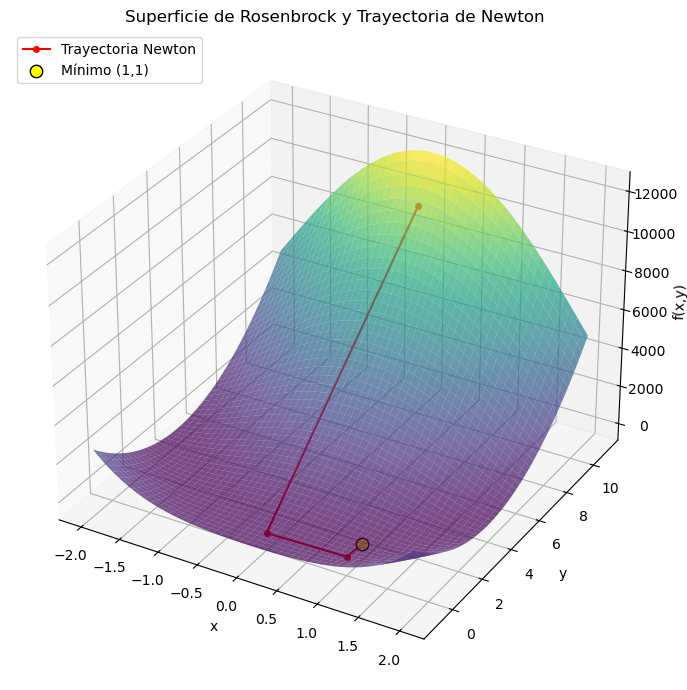

In [8]:
# Visualización 3D de la superficie y la trayectoria
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 (import requerido)

# Crear malla para la superficie
X = np.linspace(-2, 2, 200)
Y = np.linspace(-1, 11, 200)
XX, YY = np.meshgrid(X, Y)
ZZ = (XX - 1)**2 + 100*(YY - XX**2)**2

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Superficie
ax.plot_surface(XX, YY, ZZ, cmap='viridis', alpha=0.7, linewidth=0, antialiased=True)

# Trayectoria sobre la superficie
traj_z = [(p[0] - 1)**2 + 100*(p[1] - p[0]**2)**2 for p in points_arr]
ax.plot(points_arr[:,0], points_arr[:,1], traj_z, color='red', marker='o', markersize=4, label='Trayectoria Newton')

# Punto mínimo (1,1)
min_z = f_val(np.array([1.0, 1.0]))
ax.scatter(1.0, 1.0, min_z, color='yellow', s=80, edgecolor='black', label='Mínimo (1,1)')

ax.set_title('Superficie de Rosenbrock y Trayectoria de Newton')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
ax.legend(loc='upper left')
plt.tight_layout()
plt.show()

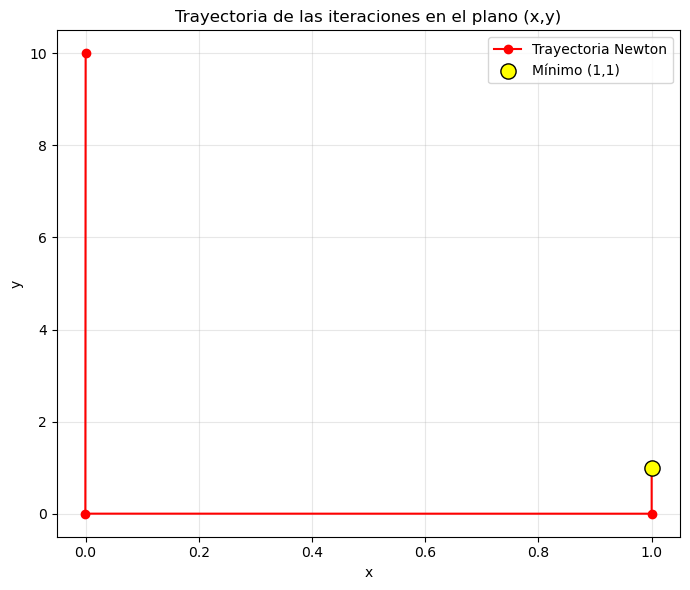

In [9]:
# Trayectoria en el plano (x, y)
plt.figure(figsize=(7,6))
plt.plot(points_arr[:,0], points_arr[:,1], marker='o', color='red', label='Trayectoria Newton')
plt.scatter([1],[1], color='yellow', edgecolor='black', s=120, zorder=5, label='Mínimo (1,1)')
plt.title('Trayectoria de las iteraciones en el plano (x,y)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

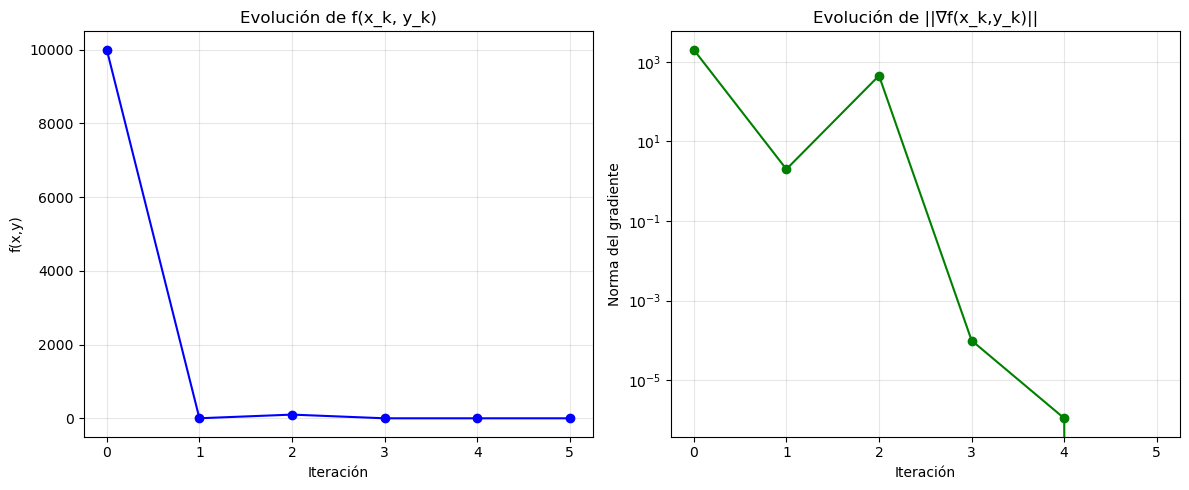

Último punto: [1. 1.]
Distancia al mínimo teórico (1,1): 0.000e+00


In [10]:
# Evolución de f(x,y) y de la norma del gradiente
iters = range(len(fun_values))

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(iters, fun_values, marker='o', color='blue')
plt.title('Evolución de f(x_k, y_k)')
plt.xlabel('Iteración')
plt.ylabel('f(x,y)')
plt.grid(alpha=0.3)

plt.subplot(1,2,2)
plt.plot(iters, grad_norms, marker='o', color='green')
plt.title('Evolución de ||∇f(x_k,y_k)||')
plt.xlabel('Iteración')
plt.ylabel('Norma del gradiente')
plt.yscale('log')  # escala log para apreciar caída
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Confirmación de convergencia
last_point = points_arr[-1]
print(f"Último punto: {last_point}")
print(f"Distancia al mínimo teórico (1,1): {np.linalg.norm(last_point - np.array([1.0,1.0])):.3e}")

## Conclusiones
El método de Newton-Raphson aplicado a la función de Rosenbrock ha convergido al mínimo global $(1,1)$ con alta precisión, cumpliendo el criterio de tolerancia sobre la norma del gradiente.

### Observaciones clave
- La trayectoria muestra que, desde un punto inicial lejano $(0,10)$, el algoritmo ajusta rápidamente la coordenada $y$ y entra en el valle curvo característico de Rosenbrock.
- La convergencia acelera cerca del mínimo gracias a la información de la Hessiana.
- Las gráficas confirman la caída pronunciada del valor de la función y del gradiente.

### Consideraciones adicionales
- En problemas más complejos o con Hessianas mal condicionadas, puede ser necesario incorporar búsqueda de paso (*line search*) o regularización.
- La función de Rosenbrock es un buen ejemplo donde Newton supera métodos de primer orden cerca del óptimo.

**Resultado final:** Se verificó la proximidad al punto $(1,1)$ y un valor de $f(x,y)$ cercano a cero, evidenciando convergencia exitosa.
